<font color="red" size=5> Variables

* Altura [cm]
* Resistencia - bulbo seco [Ω]
* Resistencia - bulbo húmedo [Ω]
* Saturación [min]: A los cuántos minutos se llegó a la saturación
* Hora 

# <font color='blue'> Carga de datos

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_style(rc={'axes.facecolor': '#FFFFFF', 'axes.edgecolor':'black'})

In [2]:
# Suelo desnudo
sd = pd.read_excel('/content/Datos_P2.xlsx', header = 2, usecols=[0, 1, 2, 4]).fillna(method='ffill')
sd.columns = ['z', 'Rs', 'Rh', 'Hora']; sd['Hora']= pd.TimedeltaIndex(sd['Hora'].astype(str))
sd.set_index(['Hora', 'z'], inplace = True)

# Cobertura vegetal
cv = pd.read_excel('/content/Datos_P2.xlsx', header = 2, usecols=[0, 5, 6, 8]).fillna(method='ffill')
cv.columns = ['z', 'Rs', 'Rh', 'Hora']; cv['Hora']= pd.TimedeltaIndex(cv['Hora'].astype(str))
cv.set_index(['Hora', 'z'], inplace = True) # Reordenando el dataframe mediante índices
# cv.head(10)
cv.unstack()

Rs                          Rh                    
z                 0     30    50    100  160  0    30   50   100  160
Hora                                                                 
0 days 09:50:00  1471  1490  1517  1489  823  673  710  710  730  767
0 days 09:55:00  1730  1328  1349  1330  668  671  692  695  730  764
0 days 10:01:00  1311  1303  1322  1301  656  656  688  686  721  755
0 days 10:05:00  1303  1309  1310  1288  640  642  680  692  720  743
0 days 10:10:00  1278  1269  1284  1259  637  648  682  684  715  748
0 days 10:14:00  1246  1225  1244  1217  608  645  673  677  709  738
0 days 10:18:00  1229  1246  1265  1260  631  660  687  683  719  755
0 days 10:22:00  1219  1236  1265  1237  614  656  685  683  716  746

In [3]:
# Reordenamiento fila-columna
cv.unstack()

Rs                          Rh                    
z                 0     30    50    100  160  0    30   50   100  160
Hora                                                                 
0 days 09:50:00  1471  1490  1517  1489  823  673  710  710  730  767
0 days 09:55:00  1730  1328  1349  1330  668  671  692  695  730  764
0 days 10:01:00  1311  1303  1322  1301  656  656  688  686  721  755
0 days 10:05:00  1303  1309  1310  1288  640  642  680  692  720  743
0 days 10:10:00  1278  1269  1284  1259  637  648  682  684  715  748
0 days 10:14:00  1246  1225  1244  1217  608  645  673  677  709  738
0 days 10:18:00  1229  1246  1265  1260  631  660  687  683  719  755
0 days 10:22:00  1219  1236  1265  1237  614  656  685  683  716  746

# <font color = 'green'> 1.1 Perfil de temperatura

## Coeficientes de regresión

**Y = A - B.Ln(X)**

Utilizamos arrays ya que nos brinda un procesamiento más rápido y eficiente que otros contenedores como los dataframes.


In [4]:
#                0      30      50     100     160 cm
a = np.array([487.94, 514.63, 506.96, 510.46, 216.45,   # T bulbo seco
              211.54, 201.89, 203.29, 236.84, 213.71])  # T bulbo húmedo
A = np.full((8,10), a)

B = np.array([66.238, 69.353, 68.537, 69.361, 30.936,   # T bulbo seco
              29.978, 28.571, 28.785, 34.165, 30.221])  # T bulbo húmedo

print('Matriz A:\n', A ,'\n\nMatriz B:\n',B)

Matriz A:
 [[487.94 514.63 506.96 510.46 216.45 211.54 201.89 203.29 236.84 213.71]
 [487.94 514.63 506.96 510.46 216.45 211.54 201.89 203.29 236.84 213.71]
 [487.94 514.63 506.96 510.46 216.45 211.54 201.89 203.29 236.84 213.71]
 [487.94 514.63 506.96 510.46 216.45 211.54 201.89 203.29 236.84 213.71]
 [487.94 514.63 506.96 510.46 216.45 211.54 201.89 203.29 236.84 213.71]
 [487.94 514.63 506.96 510.46 216.45 211.54 201.89 203.29 236.84 213.71]
 [487.94 514.63 506.96 510.46 216.45 211.54 201.89 203.29 236.84 213.71]
 [487.94 514.63 506.96 510.46 216.45 211.54 201.89 203.29 236.84 213.71]] 

Matriz B:
 [66.238 69.353 68.537 69.361 30.936 29.978 28.571 28.785 34.165 30.221]


## Cálculo de temperaturas

In [5]:
matrix_sd = sd.unstack().to_numpy()   # Suelo desnudo
sd_T = pd.DataFrame(A - np.log(matrix_sd)*B,  # T = A - B*Ln(R)
                    columns = sd.unstack().columns, 
                    index = sd.unstack().index).stack()
sd_T.columns = ['Ts', 'Th']; sd_T = sd_T.unstack()

matrix_cv = cv.unstack().to_numpy()   # Cobertura vegetal
cv_T = pd.DataFrame(A - np.log(matrix_cv)*B,  # T = A - B*Ln(R)
                    columns = cv.unstack().columns, 
                    index = cv.unstack().index).stack()
cv_T.columns = ['Ts', 'Th']; cv_T = cv_T.unstack()

sd_T

Ts             ...         Th           
z                      0          30   ...        100        160
Hora                                   ...                      
0 days 10:32:00  15.444743  17.467478  ...  10.939618  11.845833
0 days 10:36:00  15.233625  18.598698  ...  12.012464  13.604500
0 days 10:42:00  14.656498  18.111629  ...  11.682365  13.284274
0 days 10:50:00  15.815825  18.057720  ...  11.588633  13.204745
0 days 10:55:00  14.188016  17.627956  ...   9.589047  12.810210
0 days 11:00:00  14.813399  18.165579  ...   9.854924  11.921861
0 days 11:03:00  13.929172  16.144413  ...  10.078079  11.393640
0 days 11:08:00  15.286342  18.327682  ...   8.631494  12.967406

[8 rows x 10 columns]

In [6]:
sd_mean = sd_T.mean()
cv_mean = cv_T.mean()
cv_mean

    z  
Ts  0      11.017855
    30     17.443423
    50     14.643567
    100    13.383898
    160    15.756108
Th  0      17.084686
    30     15.252583
    50     15.186288
    100    12.061380
    160    13.566673
dtype: float64

### Cálculo paso a paso
Operaciones con matrices

In [7]:
cv.unstack()    # Reordenamos el dataframe de cobertura vegetal

Rs                          Rh                    
z                 0     30    50    100  160  0    30   50   100  160
Hora                                                                 
0 days 09:50:00  1471  1490  1517  1489  823  673  710  710  730  767
0 days 09:55:00  1730  1328  1349  1330  668  671  692  695  730  764
0 days 10:01:00  1311  1303  1322  1301  656  656  688  686  721  755
0 days 10:05:00  1303  1309  1310  1288  640  642  680  692  720  743
0 days 10:10:00  1278  1269  1284  1259  637  648  682  684  715  748
0 days 10:14:00  1246  1225  1244  1217  608  645  673  677  709  738
0 days 10:18:00  1229  1246  1265  1260  631  660  687  683  719  755
0 days 10:22:00  1219  1236  1265  1237  614  656  685  683  716  746

In [8]:
matrix_cv = cv.unstack().to_numpy() # Conversión a matriz
matrix_cv

array([[1471, 1490, 1517, 1489,  823,  673,  710,  710,  730,  767],
       [1730, 1328, 1349, 1330,  668,  671,  692,  695,  730,  764],
       [1311, 1303, 1322, 1301,  656,  656,  688,  686,  721,  755],
       [1303, 1309, 1310, 1288,  640,  642,  680,  692,  720,  743],
       [1278, 1269, 1284, 1259,  637,  648,  682,  684,  715,  748],
       [1246, 1225, 1244, 1217,  608,  645,  673,  677,  709,  738],
       [1229, 1246, 1265, 1260,  631,  660,  687,  683,  719,  755],
       [1219, 1236, 1265, 1237,  614,  656,  685,  683,  716,  746]])

In [9]:
np.log(matrix_cv) # Cálculo de logaritmo neperiano

array([[7.29369772, 7.3065314 , 7.32448998, 7.30586003, 6.7129562 ,
        6.51174533, 6.56526497, 6.56526497, 6.59304453, 6.6424868 ],
       [7.45587669, 7.19142933, 7.20711886, 7.19293422, 6.50428817,
        6.50876914, 6.53958596, 6.54391185, 6.59304453, 6.63856779],
       [7.17854548, 7.17242458, 7.18690102, 7.17088848, 6.48616079,
        6.48616079, 6.53378884, 6.53087763, 6.58063914, 6.62671775],
       [7.17242458, 7.17701877, 7.17778242, 7.16084591, 6.46146818,
        6.4645883 , 6.5220928 , 6.53958596, 6.57925121, 6.61069604],
       [7.15305163, 7.14598447, 7.15773548, 7.13807303, 6.45676966,
        6.4738907 , 6.52502966, 6.52795792, 6.57228254, 6.61740298],
       [7.1276937 , 7.11069612, 7.12608727, 7.10414409, 6.41017488,
        6.46925032, 6.51174533, 6.51767127, 6.56385553, 6.60394382],
       [7.11395611, 7.1276937 , 7.1428274 , 7.138867  , 6.44730586,
        6.49223984, 6.53233429, 6.52649486, 6.57786136, 6.62671775],
       [7.10578613, 7.11963564, 7.1428274

In [10]:
np.log(matrix_cv)*B   # Multiplicamos con constantes B

array([[483.11994962, 506.72987211, 501.99856971, 506.74175773,
        207.67201302, 195.20910149, 187.57618546, 188.98115216,
        225.25136651, 200.74259362],
       [493.86236003, 498.74719833, 493.95430505, 498.90911052,
        201.21665894, 195.11988119, 186.84251034, 188.36650247,
        225.25136651, 200.62415716],
       [475.49249575, 497.4291617 , 492.56863524, 497.37999576,
        200.65587017, 194.44212813, 186.67688089, 187.99131251,
        224.82753613, 200.2660371 ],
       [475.08705914, 497.74778247, 491.94367346, 496.68343293,
        199.8919795 , 193.79542817, 186.34271334, 188.24198173,
        224.78011766, 199.78184517],
       [473.80383419, 495.59546079, 490.56971688, 495.10388371,
        199.74662606, 194.0742953 , 186.42662235, 187.90726866,
        224.54203307, 199.9845354 ],
       [472.12417526, 493.14810822, 488.40064345, 492.75053843,
        198.30517015, 193.935186  , 186.04707581, 187.61116759,
        224.25412406, 199.57778632],
       [47

In [11]:
cv_t = A - np.log(matrix_cv)*B  # Suma de coeficientes independientes
cv_t    # Good, la fe, la fe, la fe es lo más bonito de la vida

array([[ 4.82005038,  7.90012789,  4.96143029,  3.71824227,  8.77798698,
        16.33089851, 14.31381454, 14.30884784, 11.58863349, 12.96740638],
       [-5.92236003, 15.88280167, 13.00569495, 11.55088948, 15.23334106,
        16.42011881, 15.04748966, 14.92349753, 11.58863349, 13.08584284],
       [12.44750425, 17.2008383 , 14.39136476, 13.08000424, 15.79412983,
        17.09787187, 15.21311911, 15.29868749, 12.01246387, 13.4439629 ],
       [12.85294086, 16.88221753, 15.01632654, 13.77656707, 16.5580205 ,
        17.74457183, 15.54728666, 15.04801827, 12.05988234, 13.92815483],
       [14.13616581, 19.03453921, 16.39028312, 15.35611629, 16.70337394,
        17.4657047 , 15.46337765, 15.38273134, 12.29796693, 13.7254646 ],
       [15.81582474, 21.48189178, 18.55935655, 17.70946157, 18.14482985,
        17.604814  , 15.84292419, 15.67883241, 12.58587594, 14.13221368],
       [16.72577521, 20.30305887, 17.41203841, 15.30104602, 16.99614584,
        16.91563423, 15.25467694, 15.42484547

In [12]:
pd.DataFrame(cv_t, 
             columns = cv.unstack().columns, 
             index = cv.unstack().index)
# Guardado como dataframe. nota: falta modificar el título de la columna

Rs             ...         Rh           
z                      0          30   ...        100        160
Hora                                   ...                      
0 days 09:50:00   4.820050   7.900128  ...  11.588633  12.967406
0 days 09:55:00  -5.922360  15.882802  ...  11.588633  13.085843
0 days 10:01:00  12.447504  17.200838  ...  12.012464  13.443963
0 days 10:05:00  12.852941  16.882218  ...  12.059882  13.928155
0 days 10:10:00  14.136166  19.034539  ...  12.297967  13.725465
0 days 10:14:00  15.815825  21.481892  ...  12.585876  14.132214
0 days 10:18:00  16.725775  20.303059  ...  12.107367  13.443963
0 days 10:22:00  17.266938  20.861910  ...  12.250217  13.806378

[8 rows x 10 columns]

In [13]:
cv_T = cv_T.stack()
cv_T.columns = ['Ts', 'Th']
cv_T = cv_T.unstack()

## Regresión lineal
$\displaystyle \quad Z = To - GVT*T $

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

### Suelo Desnudo
# T bulbo seco
lr.fit(sd_mean[0:5].to_numpy()[:, np.newaxis], cv.index.get_level_values('z').unique())
r2_sd_Ts = lr.score(sd_mean[0:5].to_numpy()[:, np.newaxis], cv.index.get_level_values('z').unique())
a_sd_Ts = lr.intercept_; b_sd_Ts = lr.coef_[0]
line_sd_Ts = [a_sd_Ts + b_sd_Ts*x for x in sd_mean[0:5]]

# T bulbo húmedo
lr.fit(cv_mean[5:10].to_numpy()[:, np.newaxis], cv.index.get_level_values('z').unique())
r2_sd_Th = lr.score(sd_mean[5:10].to_numpy()[:, np.newaxis], cv.index.get_level_values('z').unique())
a_sd_Th = lr.intercept_; b_sd_Th = lr.coef_[0]
line_sd_Th = [a_sd_Th + b_sd_Th*x for x in sd_mean[5:10]]

### Cobertura vegetal
# T bulbo seco
lr.fit(cv_mean[0:5].to_numpy()[:, np.newaxis], cv.index.get_level_values('z').unique())
r2_cv_Ts = lr.score(cv_mean[0:5].to_numpy()[:, np.newaxis], cv.index.get_level_values('z').unique())
a_cv_Ts = lr.intercept_; b_cv_Ts = lr.coef_[0]
line_cv_Ts = [a_cv_Ts + b_cv_Ts*x for x in cv_mean[0:5]]

# T bulbo húmedo
lr.fit(cv_mean[5:10].to_numpy()[:, np.newaxis], cv.index.get_level_values('z').unique())
r2_cv_Th = lr.score(cv_mean[5:10].to_numpy()[:, np.newaxis], cv.index.get_level_values('z').unique())
a_cv_Th = lr.intercept_; b_cv_Th = lr.coef_[0]
line_cv_Th = [a_cv_Th + b_cv_Th*x for x in cv_mean[5:10]]
line_cv_Th

[3.356815155721506,
 51.61085408497564,
 53.35692710435643,
 135.66095545331206,
 96.01444820163414]

In [15]:
sd_mean


    z  
Ts  0      14.920952
    30     17.812644
    50     14.691427
    100    13.665473
    160    16.133397
Th  0      13.553988
    30     14.153150
    50     13.823373
    100    10.547078
    160    12.629059
dtype: float64

## Regresión exponencial

Forma exponencial: $\displaystyle \quad T = To.e^{GVT.Z} $

Forma linealizada: $ \displaystyle \quad Z = -Ln(To) + \frac{1}{GVT}*Ln(T) $

In [16]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score as r2

def exp(x, a, b): return a*np.exp(b*x)
z = cv.index.get_level_values('z').unique()
### Suelo Desnudo
# T bulbo seco
nlr_sd_Ts, no = curve_fit(exp, z, sd_mean[5:10])
r2_nlr_sd_Ts = r2(z, exp(sd_mean[5:10], *nlr_sd_Ts))
noline_sd_Ts = [nlr_sd_Ts[0]*np.e**(nlr_sd_Ts[1]*x) for x in z]

# Se realizó para los demás, pero con ninguno se rechaza Ho, así que a mimir

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


## Gráfica

### Cobertura vegetal


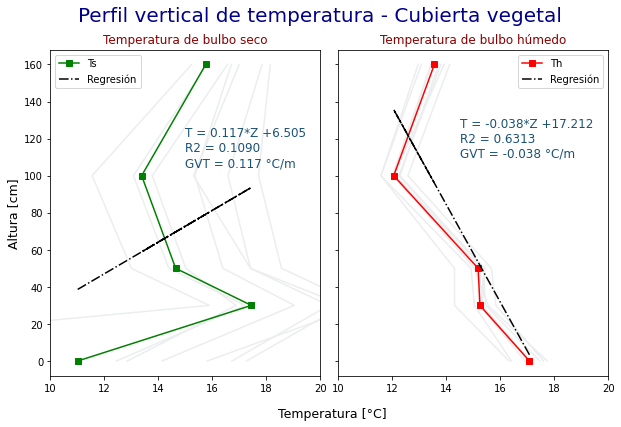

In [17]:
sns.set_style(rc={'axes.facecolor': '#FFFFFF', 'axes.edgecolor':'black'})
fig, axes = plt.subplots(1,2, figsize = (10,6), sharey = True)
plt.suptitle('Perfil vertical de temperatura - Cubierta vegetal', color= 'darkblue', fontsize = 20)
sub_dict = {'color': 'darkred', 'size': 12}
text_dict = {'color': '#1A5276', 'size': 12}

### Temperatura bulbo seco
for i in cv.index.get_level_values('Hora').unique():
  axes[0].plot(cv_T.loc[i]['Ts'], cv.index.get_level_values('z').unique(), color='#EBEDEF')

axes[0].plot(cv_mean[0:5], cv.index.get_level_values('z').unique(),
             '-sg', label = 'Ts')
axes[0].plot(cv_mean[0:5], line_cv_Ts, '-.k', label = 'Regresión')
axes[0].text(15,105,f'T = {1/b_cv_Ts:.3f}*Z +{-1*a_cv_Ts/b_cv_Ts:.3f}\nR2 = {r2_cv_Ts:.4f}\nGVT = {1/b_cv_Ts:.3f} °C/m', 
             fontdict = text_dict)
axes[0].set_title('Temperatura de bulbo seco', fontdict = sub_dict)
axes[0].legend()

### Temperatura bulbo húmedo
for i in cv.index.get_level_values('Hora').unique():
  axes[1].plot(cv_T.loc[i]['Th'], cv.index.get_level_values('z').unique(), color='#EBEDEF')

axes[1].plot(cv_mean[5:10], cv.index.get_level_values('z').unique(),
             '-sr', label = 'Th')
axes[1].plot(cv_mean[5:10], line_cv_Th, '-.k', label = 'Regresión')
axes[1].text(14.5,110,f'T = {1/b_cv_Th:.3f}*Z +{-1*a_cv_Th/b_cv_Th:.3f}\nR2 = {r2_cv_Th:.4f}\nGVT = {1/b_cv_Th:.3f} °C/m', 
             fontdict =text_dict)
axes[1].set_title('Temperatura de bulbo húmedo', fontdict = sub_dict)
axes[1].legend()

axes[0].set_xlim(10, 20); axes[1].set_xlim(10, 20)
axes[0].set_ylabel('Altura [cm]', fontsize = 12.5)
axes[0].set_xlabel('Temperatura [°C]', fontsize = 12.5)
axes[0].xaxis.set_label_coords(1.045,-0.095)
plt.subplots_adjust(wspace = 0.065)

### Suelo desnudo

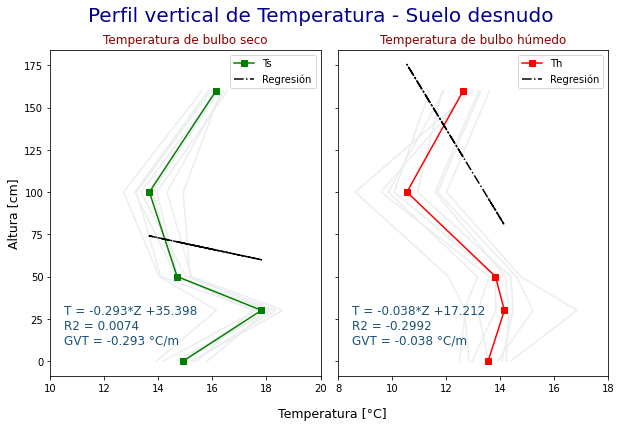

In [18]:
sns.set_style(rc={'axes.facecolor': '#FFFFFF', 'axes.edgecolor':'black'})
fig, axes = plt.subplots(1,2, figsize = (10,6), sharey = True)
plt.suptitle('Perfil vertical de Temperatura - Suelo desnudo', color= 'darkblue', fontsize = 20)
sub_dict = {'color': 'darkred', 'size': 12}
text_dict = {'color': '#1A5276', 'size': 12}

### Temperatura bulbo seco
for i in sd.index.get_level_values('Hora').unique():
  axes[0].plot(sd_T.loc[i]['Ts'], cv.index.get_level_values('z').unique(), color='#EBEDEF')

axes[0].plot(sd_mean[0:5], sd.index.get_level_values('z').unique(),
             '-sg', label = 'Ts')
axes[0].plot(sd_mean[0:5], line_sd_Ts, '-.k', label = 'Regresión')
axes[0].text(10.5,10,f'T = {1/b_sd_Ts:.3f}*Z +{-1*a_sd_Ts/b_sd_Ts:.3f}\nR2 = {r2_sd_Ts:.4f}\nGVT = {1/b_sd_Ts:.3f} °C/m', 
             fontdict = text_dict)
axes[0].set_title('Temperatura de bulbo seco', fontdict = sub_dict)
axes[0].legend()

### Temperatura bulbo húmedo
for i in sd.index.get_level_values('Hora').unique():
  axes[1].plot(sd_T.loc[i]['Th'], sd.index.get_level_values('z').unique(), color='#EBEDEF')

axes[1].plot(sd_mean[5:10], sd.index.get_level_values('z').unique(),
             '-sr', label = 'Th')
axes[1].plot(sd_mean[5:10], line_sd_Th, '-.k', label = 'Regresión')
axes[1].text(8.5,10,f'T = {1/b_sd_Th:.3f}*Z +{-1*a_sd_Th/b_sd_Th:.3f}\nR2 = {r2_sd_Th:.4f}\nGVT = {1/b_sd_Th:.3f} °C/m', 
             fontdict =text_dict)
axes[1].set_title('Temperatura de bulbo húmedo', fontdict = sub_dict)
axes[1].legend()

axes[0].set_xlim(10, 20); axes[1].set_xlim(8, 18)
axes[0].set_ylabel('Altura [cm]', fontsize = 12.5)
axes[0].set_xlabel('Temperatura [°C]', fontsize = 12.5)
axes[0].xaxis.set_label_coords(1.045,-0.095)
plt.subplots_adjust(wspace = 0.065)

# <font color = 'green'> 1.2 Presión de vapor

Información extra:
* Altura de la estación Alexander Von Humbolt - La Molina: 247 m.s.n.m.
* Epsilón: 0.622

## Suelo desnudo

In [19]:
sd_Ts = sd_T['Ts'].to_numpy()
sd_Th = sd_T['Th'].to_numpy()

P = 1014.78*np.e**(-0.0001169*247)
L = 597.3 - 0.56*sd_Ts
Ts_Th = sd_Ts - sd_Th

e_bh = 6.11*np.power(10, (sd_Th*7.5)/(237.5 + sd_Th))
e = e_bh - 0.24/0.622*P*Ts_Th/L

In [20]:
e

array([[15.14324823, 14.54016221, 16.18496043, 11.13535739, 10.83025149],
       [15.84303669, 18.02330206, 16.47921082, 12.54417921, 13.75644422],
       [15.37613943, 15.40174869, 16.56768362, 12.37851808, 13.35231299],
       [15.18309735, 13.88107115, 15.87442345, 12.64889647, 13.46843838],
       [15.13447225, 12.2517224 , 15.23872184,  9.62269813, 12.76578385],
       [13.54842468, 11.09373487, 13.82213697,  8.88813571, 11.10559533],
       [14.31301525, 14.31485254, 15.66851591, 10.64571332, 10.74740342],
       [12.67243197, 11.04932398, 12.20721426,  8.15447744, 12.86605737]])

In [21]:
sd_e = pd.DataFrame(e, columns = sd.unstack()['Rs'].columns, index = sd.unstack().index)
sd_e_mean = sd_e.mean()
sd_e

z,0,30,50,100,160
Hora,,,,,
0 days 10:32:00,15.143248,14.540162,16.184960,11.135357,10.830251
0 days 10:36:00,15.843037,18.023302,16.479211,12.544179,13.756444
0 days 10:42:00,15.376139,15.401749,16.567684,12.378518,13.352313
0 days 10:50:00,15.183097,13.881071,15.874423,12.648896,13.468438
0 days 10:55:00,15.134472,12.251722,15.238722,9.622698,12.765784
0 days 11:00:00,13.548425,11.093735,13.822137,8.888136,11.105595
0 days 11:03:00,14.313015,14.314853,15.668516,10.645713,10.747403
0 days 11:08:00,12.672432,11.049324,12.207214,8.154477,12.866057


In [22]:
sd_ebh = pd.DataFrame(e_bh, columns = sd.unstack()['Rs'].columns, index = sd.unstack().index)
sd_ebh_mean = sd_ebh.mean(); sd_ebh

z,0,30,50,100,160
Hora,,,,,
0 days 10:32:00,16.039144,16.477604,16.387147,13.070464,13.878692
0 days 10:36:00,16.387728,19.165585,16.781341,14.031990,15.573312
0 days 10:42:00,15.868715,17.279651,16.604505,13.729735,15.251871
0 days 10:50:00,16.212132,16.306568,16.173792,13.644959,15.172949
0 days 10:55:00,15.535337,15.138614,15.556792,11.942677,14.786699
0 days 11:00:00,14.819996,14.653257,15.125246,12.157672,13.948453
0 days 11:03:00,14.935998,15.808311,15.799534,12.340741,13.470068
0 days 11:08:00,14.479400,14.689805,14.100131,11.195820,14.939547


## Cobertura vegetal

In [23]:
# Conversión a matrices de Ts y Th
cv_Ts = cv_T['Ts'].to_numpy()
cv_Th = cv_T['Th'].to_numpy()

# Presión atmosférica
P = 1014.78*np.e**(-0.0001169*247)
L = 597.3 - 0.56*cv_Ts  # Calor latente
Ts_Th = cv_Ts - cv_Th   # Diferencia entre Ts y Th

# Presión de vapor de saturación
e_bh = 6.11*np.power(10, (cv_Th*7.5)/(237.5 + cv_Th))
# Presión de vapor
e = e_bh - 0.24/0.622*P*np.divide(Ts_Th, L)

In [24]:
# Conversión a dataframe
cv_ebh = pd.DataFrame(e_bh, columns = cv.unstack()['Rs'].columns, index = cv.unstack().index)
cv_ebh_mean = cv_ebh.mean()   # Cálculo de promedio

cv_e = pd.DataFrame(e, columns = cv.unstack()['Rs'].columns, index = cv.unstack().index)
cv_e_mean = cv_e.mean(); cv_e

z,0,30,50,100,160
Hora,,,,,
0 days 09:50:00,25.924186,20.421823,22.282372,18.675020,17.629862
0 days 09:55:00,32.816498,16.556662,18.197350,13.669261,13.668098
0 days 10:01:00,22.482330,15.992954,17.960601,13.343650,13.892150
0 days 10:05:00,23.450796,16.790127,17.117754,12.968250,14.202891
0 days 10:10:00,22.092793,15.243594,16.817069,12.321972,13.769518
0 days 10:14:00,21.276025,14.325900,15.936250,11.252725,13.516213
0 days 10:18:00,19.384899,14.048199,16.229402,12.056356,13.112469
0 days 10:22:00,19.376165,13.830406,16.229402,11.452926,13.165676


In [25]:
cv_ebh

z,0,30,50,100,160
Hora,,,,,
0 days 09:50:00,18.559831,16.306568,16.301331,13.644959,14.939547
0 days 09:55:00,18.665506,17.096700,16.960856,13.644959,15.055622
0 days 10:01:00,19.485613,17.279651,17.374838,14.031990,15.411431
0 days 10:05:00,20.297395,17.653996,17.097282,14.075886,15.904222
0 days 10:10:00,19.943781,17.559336,17.468777,14.298109,15.696275
0 days 10:14:00,20.119497,17.991087,17.803297,14.570949,16.116011
0 days 10:18:00,19.262055,17.325823,17.516016,14.119963,15.411431
0 days 10:22:00,19.485613,17.418695,17.516016,14.253295,15.778998


## Gráfica

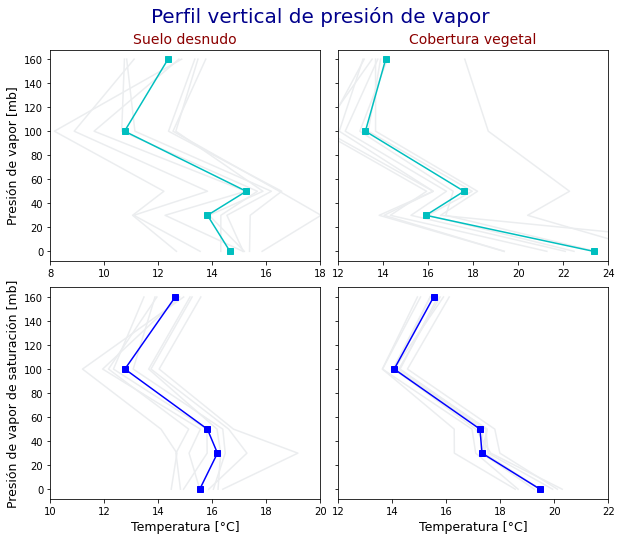

In [26]:
sns.set_style(rc={'axes.facecolor': '#FFFFFF', 'axes.edgecolor':'black'})
fig, axes = plt.subplots(2,2, figsize = (10,8), sharey = True)
plt.suptitle('Perfil vertical de presión de vapor', color= 'darkblue', fontsize = 20)
sub_dict = {'color': 'darkred', 'size': 14}; text_dict = {'color': '#1A5276', 'size': 12}

### Suelo desnudo - e
for i in sd.index.get_level_values('Hora').unique():
  axes[0,0].plot(sd_e.loc[i], sd.index.get_level_values('z').unique(), color='#EBEDEF')
axes[0,0].plot(sd_e_mean, sd.index.get_level_values('z').unique(),'-sc', label = 'e sd')
axes[0,0].set_title('Suelo desnudo', fontdict = sub_dict)
### Suelo desnudo - ebh
for i in sd.index.get_level_values('Hora').unique():
  axes[1,0].plot(sd_ebh.loc[i], sd.index.get_level_values('z').unique(), color='#EBEDEF')
axes[1,0].plot(sd_ebh_mean, sd.index.get_level_values('z').unique(),'-sb', label = 'ebh sd')
### Cobertura vegetal - e
for i in cv.index.get_level_values('Hora').unique():
  axes[0,1].plot(cv_e.loc[i], cv.index.get_level_values('z').unique(), color='#EBEDEF')
axes[0,1].plot(cv_e_mean, cv.index.get_level_values('z').unique(),'-sc', label = 'e cv')
axes[0,1].set_title('Cobertura vegetal', fontdict = sub_dict)
### Cobertura vegetal - ebh
for i in cv.index.get_level_values('Hora').unique():
  axes[1,1].plot(cv_ebh.loc[i], cv.index.get_level_values('z').unique(), color='#EBEDEF')
axes[1,1].plot(cv_ebh_mean, cv.index.get_level_values('z').unique(),'-sb', label = 'ebh cv')

axes[0,0].set_xlim(8, 18); axes[1,0].set_xlim(10, 20)
axes[0,1].set_xlim(12, 24); axes[1,1].set_xlim(12, 22)
axes[0,0].set_ylabel('Presión de vapor [mb]', fontsize = 12.5)
axes[1,0].set_ylabel('Presión de vapor de saturación [mb]', fontsize = 12.5)
axes[1,0].set_xlabel('Temperatura [°C]', fontsize = 12.5)
axes[1,1].set_xlabel('Temperatura [°C]', fontsize = 12.5)
plt.subplots_adjust(wspace = 0.065, hspace = 0.125, top = 0.905)

# Prueba de Fisher


In [27]:
def Fisher_multitest(n, R2, alpha):
  from scipy.stats import f; sns.set_style(rc={'axes.facecolor': '#FFFFFF', 'axes.edgecolor':'black'})
  fig, ax = plt.subplots(1, 1, figsize = (8,5))
  F_t = []; test = []; color = ['yellow', 'blue', 'red', 'black', 'green']
  for i in range(len(alpha)):
    q, n1, n2 = 1-alpha[i], 2, n   # alpha, P, N
    F_cal=R2/(1-R2)*(n2 - n1 - 1)/n1
    F_t.append(f.ppf(q = q, dfn = n1, dfd = n2))
    
    x = np.linspace(f.ppf(0.01, n1, n2), f.ppf(0.99, n1, n2), 100)
    ax.fill_between(x[x>f.ppf(q, n1, n2)], y1 = 0, y2 = f.pdf(x[x>f.ppf(q, n1, n2)], n1, n2),
                    alpha = 0.45, color = color[i], label = f'{alpha[i]}')
    if F_cal > F_t[i]:   test.append(True)
    elif F_cal < F_t[i]: test.append(False)
  ax.legend(title = 'Alpha')
  ax.plot(x, np.full(100, 0), 'k-', lw=1); ax.plot(x,f.pdf(x, n1, n2),'k-',lw=2,alpha=0.45)
  Fisher_test = pd.DataFrame({'alpha': alpha, 'F teórico': F_t, 'Ho': test})

  print(f'El estadítico de Fisher es igual a: {F_cal:.4f}\n')
  print(Fisher_test); plt.show()
  Ho_true=Fisher_test[Fisher_test['Ho']==True]
  a = ', '.join(Ho_true['alpha'].astype(str))
  if len(Ho_true)!=0:
    print('\nA un nivel de significación de ' + a) 
    print('existe suficiente evidencia estadística para rechazar Ho.')
    print('Por lo que, A y B son diferentes a cero')
  else: 
    print('\nA un nivel de significación de ' + a) 
    print('no existe suficiente evidencia estadística para rechazar Ho.')
    print('Por lo que, A y B son iguales a cero.')
    print('PD: para el otro ciclo será')
    import matplotlib.image as mpimg
    sns.set_style(rc={'axes.facecolor': '#FFFFFF', 'axes.edgecolor':'white'})
    img = mpimg.imread('https://drive.google.com/thumbnail?id=1jaLn0Qo3G3T8CJhd4zlFEL8WCPbB7fRU')
    imgplot = plt.imshow(img); plt.rcParams['axes.facecolor'] = 'white'
    plt.xticks(fontsize=0); plt.yticks(fontsize=0), plt.grid(False)
    plt.show()

El estadítico de Fisher es igual a: 0.0074

   alpha  F teórico     Ho
0   0.10   3.779716  False
1   0.05   5.786135  False
2   0.01  13.273934  False


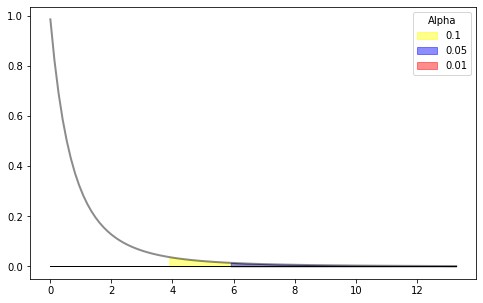


A un nivel de significación de 
no existe suficiente evidencia estadística para rechazar Ho.
Por lo que, A y B son iguales a cero.
PD: para el otro ciclo será


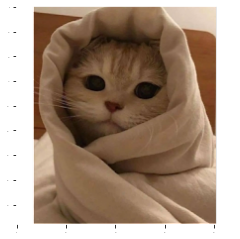

In [28]:
Fisher_multitest(n = len(cv_mean[0:5]), R2 = r2_sd_Ts, alpha = [0.1, 0.05, 0.01])

# <font color = 'green'> 2. Gradiente de temperatura

In [29]:
col = cv_T['Ts'].columns.to_list()
GVT_cv_Ts = []; GVT_cv_Th = []
GVT_sd_Ts = []; GVT_sd_Th = []

for i in range(len(col)-1):
  GVT_cv_Ts.append((cv_T['Ts'][col[i+1]]-cv_T['Ts'][col[i]])/(col[i+1]-col[i]))
  GVT_cv_Th.append((cv_T['Th'][col[i+1]]-cv_T['Th'][col[i]])/(col[i+1]-col[i]))
  GVT_sd_Ts.append((sd_T['Ts'][col[i+1]]-sd_T['Ts'][col[i]])/(col[i+1]-col[i]))
  GVT_sd_Th.append((sd_T['Th'][col[i+1]]-sd_T['Th'][col[i]])/(col[i+1]-col[i]))

col_GVT = ['0-30', '30-50', '50-100', '100-160']
GVT_cv_Ts = pd.DataFrame(GVT_cv_Ts, index = col_GVT).transpose()
GVT_cv_Th = pd.DataFrame(GVT_cv_Th, index = col_GVT).transpose()
GVT_sd_Ts = pd.DataFrame(GVT_sd_Ts, index = col_GVT).transpose()
GVT_sd_Th = pd.DataFrame(GVT_sd_Th, index = col_GVT).transpose()

GVT_cv_Ts

,0-30,30-50,50-100,100-160
Hora,,,,
0 days 09:50:00,0.102669,-0.146935,-0.024864,0.084329
0 days 09:55:00,0.726839,-0.143855,-0.029096,0.061374
0 days 10:01:00,0.158444,-0.140474,-0.026227,0.045235
0 days 10:05:00,0.134309,-0.093295,-0.024795,0.046358
0 days 10:10:00,0.163279,-0.132213,-0.020683,0.022454
0 days 10:14:00,0.188869,-0.146127,-0.016998,0.007256
0 days 10:18:00,0.119243,-0.144551,-0.042220,0.028252
0 days 10:22:00,0.119832,-0.172494,-0.016664,0.021036


# Intentos 
No evaluar esto

In [30]:
cv_T.index.get_level_values('Hora')

TimedeltaIndex(['0 days 09:50:00', '0 days 09:55:00', '0 days 10:01:00',
                '0 days 10:05:00', '0 days 10:10:00', '0 days 10:14:00',
                '0 days 10:18:00', '0 days 10:22:00'],
               dtype='timedelta64[ns]', name='Hora', freq=None)

In [31]:
cv.loc['09:50:00']

,Rs,Rh
z,,
0,1471,673
30,1490,710
50,1517,710
100,1489,730
160,823,767


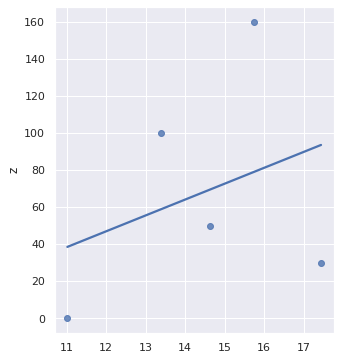

In [32]:
sns.set(rc={'figure.figsize':(5,6)})
sns.regplot(x = cv_mean[0:5], y = cv.index.get_level_values('z').unique(), ci=None)